In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
#!pip install tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# DATA IMPORT

In [ ]:
import tensorflow as tf

In [ ]:

file="/content/drive/MyDrive/Colab Notebooks/all-data.csv"

# Detect encoding
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'confidence': 0.73, 'encoding': 'Windows-1252', 'language': ''}

In [ ]:
df=pd.read_csv(file,encoding='Windows-1252',header=None)

In [ ]:
df.head()

,0,1
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [ ]:
mycolumns = ['Sentiment','Sentence']

df.columns=mycolumns

In [ ]:
pf=df[['Sentence','Sentiment']]

In [ ]:
pf.head()

,Sentence,Sentiment
0,"According to Gran , the company has no plans t...",neutral
1,Technopolis plans to develop in stages an area...,neutral
2,The international electronic industry company ...,negative
3,With the new production plant the company woul...,positive
4,According to the company 's updated strategy f...,positive


# DATA PREPARATION

In [ ]:
 pf['Sentence']=pf["Sentence"].str.lower()

In [ ]:
pf['Sentiments'] = pf['Sentiment'].map({'neutral':0,'positive':1,'negative':-1})

# TF-IDF IMPLEMENTATION

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

analyze = vectorizer.build_analyzer()

In [ ]:
vectorizer.fit(pf["Sentence"])

features=vectorizer.transform(pf["Sentence"])

final=pd.DataFrame(features.todense(), columns = vectorizer.get_feature_names())

final['Sentiment']=pf['Sentiments']

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
final.head()

,00,000,000063,002,0025,003,0030,007,008,01,...,ærnits,ærtsil,ærvi,ærvinen,æsein,æskyl,ætehuolto,ðl,ˆeur,Sentiment
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.147059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
final.describe()

,00,000,000063,002,0025,003,0030,007,008,01,...,ærnits,ærtsil,ærvi,ærvinen,æsein,æskyl,ætehuolto,ðl,ˆeur,Sentiment
count,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000,...,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000
mean,0.001026,0.007455,0.000058,0.000074,0.000048,0.000050,0.000042,0.000095,0.000078,0.000613,...,0.000047,0.000238,0.000363,0.000104,0.000060,0.000057,0.000063,0.000095,0.000066,0.156624
std,0.015828,0.041798,0.004017,0.005170,0.003336,0.003453,0.002890,0.006592,0.005395,0.013120,...,0.003244,0.008483,0.010453,0.007254,0.004152,0.003980,0.004407,0.006622,0.004569,0.617616
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,0.345644,0.561153,0.279671,0.359932,0.232234,0.240369,0.201161,0.458920,0.375585,0.466995,...,0.225802,0.335597,0.347404,0.504985,0.289021,0.277057,0.306802,0.460949,0.318089,1.000000


In [ ]:
final.Sentiment.sum()

759

#  Data Cleaning

In [ ]:
final = final.drop(final.columns[final.sum() < 0.5], axis=1)
#final['Sentiment'] = Doc[0]



In [ ]:
final.shape

(4846, 4815)

# TEST - TRAIN SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X = final.drop('Sentiment',axis=1)
y = final['Sentiment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# RANDOM FOREST IMPLEMENTATION AND TUNING

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score,mean_absolute_error,mean_squared_error


In [ ]:
test_error = []

for n in range(1,10):
    # Use n random trees
    model = RandomForestClassifier(n_estimators=n,max_features='auto')
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))
    print(accuracy_score(test_preds,y_test)*100)

62.88659793814433
63.71134020618556
65.77319587628865
69.0721649484536
69.69072164948453
70.30927835051546
70.30927835051546
71.95876288659794
70.30927835051546


In [ ]:
test_error = []

for n in range(1,20):
    # Use n random trees
    model = RandomForestClassifier(n_estimators=n,max_features='sqrt')
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))
    print(accuracy_score(test_preds,y_test)*100)

67.83505154639175
61.23711340206186
65.36082474226804
67.21649484536083
66.18556701030927
68.24742268041237
70.10309278350515
70.10309278350515
71.1340206185567
72.57731958762886
72.98969072164948
72.57731958762886
72.37113402061856
70.30927835051546
72.98969072164948
71.1340206185567
71.34020618556701
71.75257731958763
72.37113402061856


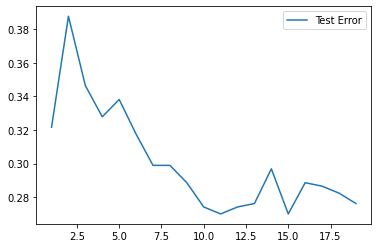

In [ ]:
plt.plot(range(1,20),test_error,label='Test Error')
plt.legend()

In [ ]:
model = RandomForestClassifier(n_estimators=9,max_features='auto',random_state=101)

model.fit(X_train,y_train)

pred_RF = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


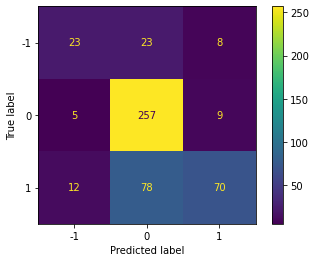

In [ ]:
plot_confusion_matrix(model,X_test,y_test)

#### MODEL TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV        # takes much time to run on pc

n_estimators=[64,100,128,200]
max_features= ['auto','sqrt']


param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             }

rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

grid.fit(X_train,y_train)

grid.best_params_

KeyboardInterrupt: ignored

# XGB IMPLEMENTATION

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

KeyboardInterrupt: ignored

# NEURAL NETWORK IMPLEMENTATION

In [ ]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train_scaled = scaler.transform(X_train)

X_test_scaled  = scaler.transform(X_test)

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(4,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))

In [ ]:
model.compile(optimizer = 'adam',loss='mse')

model.fit(X_train_scaled,y_train,epochs=50,batch_size=256)

Epoch 1/50
18/18 [==============================] - 1s 10ms/step - loss: 0.3934
Epoch 2/50
18/18 [==============================] - 0s 9ms/step - loss: 0.3691
Epoch 3/50
18/18 [==============================] - 0s 10ms/step - loss: 0.3442
Epoch 4/50
18/18 [==============================] - 0s 9ms/step - loss: 0.3044
Epoch 5/50
18/18 [==============================] - 0s 9ms/step - loss: 0.2490
Epoch 6/50
18/18 [==============================] - 0s 10ms/step - loss: 0.1961
Epoch 7/50
18/18 [==============================] - 0s 9ms/step - loss: 0.1540
Epoch 8/50
18/18 [==============================] - 0s 9ms/step - loss: 0.1244
Epoch 9/50
18/18 [==============================] - 0s 10ms/step - loss: 0.1008
Epoch 10/50
18/18 [==============================] - 0s 9ms/step - loss: 0.0844
Epoch 11/50
18/18 [==============================] - 0s 9ms/step - loss: 0.0701
Epoch 12/50
18/18 [==============================] - 0s 9ms/step - loss: 0.0598
Epoch 13/50
18/18 [==========================

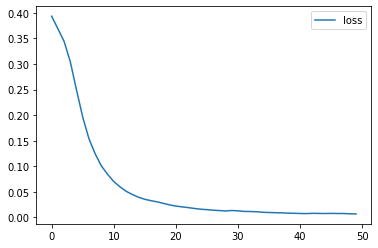

In [ ]:
loss= pd.DataFrame(model.history.history)
loss.plot()

In [ ]:
#model.evaluate(X_test_scaled,y_test,verbose=0)

pred_nn =model.predict(X_test_scaled)

#checking for errors



In [ ]:
mean_squared_error(y_test,pred_nn)

0.3653642940267524

## NEURAL NETWORKS AFTER  LABEL ENCODING

In [ ]:
## This is made seperate as we have used label encoding which is different than previous 3 models
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [ ]:
X.shape

(4846, 4814)

In [ ]:
all_labels = pf['Sentiment'].values

In [ ]:
all_inputs = X.values

In [ ]:
#all_labels

In [ ]:
all_inputs

array([[0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.147059, 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       ...,
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ]])

In [ ]:
encoder = LabelEncoder()
encoder.fit(all_labels)
encoded_Y = encoder.transform(all_labels)

dummy_y = np_utils.to_categorical(encoded_Y)

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=all_inputs.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
all_inputs.shape

(4846, 4814)

In [ ]:
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(all_inputs,dummy_y, test_size=0.1, random_state=101)

In [ ]:
train_x = np.asarray(X_train_encoded)
train_y = np.asarray(y_train_encoded)
validation_x = np.asarray(X_test_encoded)
validation_y = np.asarray(y_test_encoded)

In [ ]:
model.fit(train_x,train_y, epochs=30)

Epoch 1/30
137/137 [==============================] - 1s 5ms/step - loss: 0.9296 - accuracy: 0.5955
Epoch 2/30
137/137 [==============================] - 1s 5ms/step - loss: 0.6852 - accuracy: 0.6723
Epoch 3/30
137/137 [==============================] - 1s 5ms/step - loss: 0.5078 - accuracy: 0.7806
Epoch 4/30
137/137 [==============================] - 1s 5ms/step - loss: 0.3664 - accuracy: 0.8374
Epoch 5/30
137/137 [==============================] - 1s 5ms/step - loss: 0.2555 - accuracy: 0.8647
Epoch 6/30
137/137 [==============================] - 1s 5ms/step - loss: 0.1559 - accuracy: 0.9427
Epoch 7/30
137/137 [==============================] - 1s 5ms/step - loss: 0.0680 - accuracy: 0.9851
Epoch 8/30
137/137 [==============================] - 1s 5ms/step - loss: 0.0393 - accuracy: 0.9901
Epoch 9/30
137/137 [==============================] - 1s 5ms/step - loss: 0.0259 - accuracy: 0.9931
Epoch 10/30
137/137 [==============================] - 1s 5ms/step - loss: 0.0204 - accuracy: 0.9938

In [ ]:
pred_train = model.predict(train_x)
scores = model.evaluate(train_x, train_y, verbose=0)
print('Accuracy on training data: {} \n Error on training data: {}'.format(scores[1], 1 - scores[1]))

pred_test= model.predict(validation_x)
scores2 = model.evaluate(validation_x, validation_y, verbose=0)
print('Accuracy on test data: {} \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))

Accuracy on training data: 0.9993121027946472 
 Error on training data: 0.0006878972053527832
Accuracy on test data: 0.7443298697471619 
 Error on test data: 0.25567013025283813


In [ ]:
pred_test

array([[1.68955214e-08, 1.00000000e+00, 5.61982709e-08],
       [1.15157206e-07, 6.25306825e-07, 9.99999285e-01],
       [5.12868399e-03, 2.17765778e-01, 7.77105570e-01],
       ...,
       [2.32483508e-05, 8.76630902e-01, 1.23345964e-01],
       [1.41707676e-06, 9.68589842e-01, 3.14087719e-02],
       [9.86263394e-01, 1.30706765e-02, 6.65888365e-04]], dtype=float32)

# Decision Trees


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 15).fit(X_train,y_train)
y_pred = dtree.predict(X_test)



In [ ]:
print(y_pred)

[ 0  0  0  0  0  0  0  0 -1  0  1 -1  0  0  0  0  0  0  0  1  1  0 -1  0
  0  0  1 -1  0  0  0  0  1  1  0 -1  0  0  0  0  0  0  0  0  0  0  0  0
  0  1  0  0 -1  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  1  1  0
 -1  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  0 -1  1  0  0  0  1  0  1  0  0  0  0  0  0  0  0  1  0  0  0
  0  0  0  1  1  0 -1  1  0  0  0  0  0  0 -1  0  0  0  0 -1  0  0  1  1
  0  0  1  1  0  1 -1  0 -1  0  0  0  0  0  0  1  1 -1 -1  0  0  0  0  0
  0  1  0  0  0  0  0  0  0  1  0  0  0  1  1  0  0  0  0  1  1  0  0  0
  1  0  1  0  0  0  0  0  1  0  0  0 -1  0  0  0 -1  0  0  0  0  0  0  0
  0 -1 -1  0  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  1  1  0  1  0
  0  1  0  0  0  0  0  0  1  0  0  0  1 -1  0  0  0  0  0  0  0  0  0  1
  0  0 -1  0  0  0  0  0  1  0  0  0  0  0 -1  0  1  0  0  1  0  1  0  0
  0  0  1  0  0  0  0  0  0  0  1  0 -1  0  1  0  0  0  0  0  0 -1  0  0
  0  0  0  0  1  0  1  1  0  0  0  0  0  0  0  0  0

In [ ]:
count = 0
#for i in range(len(y_pred)):
 # if y_pred[i]==y_test[i]:
  #  count = count+1






accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
#accuracy = count/len(y_pred)
#print('accuracy = ' ,accuracy*100 , '%')

Accuracy: 68.04%


# UNIDIRECTIONAL LSTM

In [ ]:
model_lstm = Sequential()
model_lstm.add(tf.keras.layers.LSTM(64,return_sequences=True, input_shape=(1,train_x.shape[1])))
model_lstm.add(Dense(3, activation='softmax'))
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(all_inputs,dummy_y, test_size=0.1, random_state=101)

In [ ]:
train_x = np.asarray(X_train_encoded)
train_y = np.asarray(y_train_encoded)
validation_x = np.asarray(X_test_encoded)
validation_y = np.asarray(y_test_encoded)
#X_train_dim = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))


In [ ]:
X_train_lstm = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))

In [ ]:
y_train_lstm = np.reshape(train_y, (train_y.shape[0], 1, train_y.shape[1]))

In [ ]:
X_train_lstm.shape

(4361, 1, 4814)

In [ ]:
train_y.shape

(4361, 3)

In [ ]:
model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             1249024   
                                                                 
 dense_8 (Dense)             (None, 1, 3)              195       
                                                                 
Total params: 1,249,219
Trainable params: 1,249,219
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_lstm.fit(X_train_lstm,y_train_lstm, epochs=30)

Epoch 1/30
137/137 [==============================] - 5s 13ms/step - loss: 0.9436 - accuracy: 0.6024
Epoch 2/30
137/137 [==============================] - 2s 13ms/step - loss: 0.7130 - accuracy: 0.6748
Epoch 3/30
137/137 [==============================] - 2s 13ms/step - loss: 0.5337 - accuracy: 0.7808
Epoch 4/30
137/137 [==============================] - 2s 13ms/step - loss: 0.3761 - accuracy: 0.8638
Epoch 5/30
137/137 [==============================] - 2s 13ms/step - loss: 0.2607 - accuracy: 0.9163
Epoch 6/30
137/137 [==============================] - 2s 13ms/step - loss: 0.1832 - accuracy: 0.9509
Epoch 7/30
137/137 [==============================] - 2s 13ms/step - loss: 0.1311 - accuracy: 0.9688
Epoch 8/30
137/137 [==============================] - 2s 13ms/step - loss: 0.0950 - accuracy: 0.9798
Epoch 9/30
137/137 [==============================] - 2s 13ms/step - loss: 0.0703 - accuracy: 0.9865
Epoch 10/30
137/137 [==============================] - 2s 13ms/step - loss: 0.0535 - accura

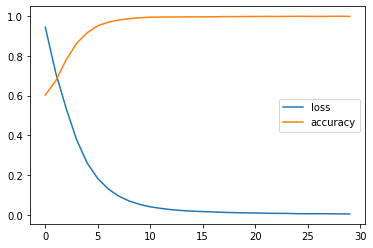

In [ ]:
model_lstm_loss = pd.DataFrame(model_lstm.history.history)
model_lstm_loss.plot()

In [ ]:
X_test_lstm = np.reshape(validation_x, (validation_x.shape[0], 1, validation_x.shape[1]))

In [ ]:
y_test_lstm = np.reshape(validation_y, (validation_y.shape[0], 1, validation_y.shape[1]))

In [ ]:
pred_train_lstm = model_lstm.predict(X_train_lstm)
scores = model_lstm.evaluate(X_train_lstm, y_train_lstm, verbose=0)

print('Accuracy on training data: {} \n Error on training data: {}'.format(scores[1]*100, (1 - scores[1])*100))

pred_test_lstm= model_lstm.predict(X_test_lstm)
scores2 = model_lstm.evaluate(X_test_lstm, y_test_lstm, verbose=0)
print('Accuracy on test data: {} \n Error on test data: {}'.format(scores2[1]*100, (1 - scores2[1])*100))

Accuracy on training data: 99.88534450531006 
 Error on training data: 0.1146554946899414
Accuracy on test data: 73.40205907821655 
 Error on test data: 26.597940921783447


In [ ]:
pred_test_lstm.shape

(485, 1, 3)

In [ ]:
pred_lstm_a=np.reshape(pred_test_lstm, (pred_test_lstm.shape[0], pred_test_lstm.shape[2]))

In [ ]:
final_predict_lstm=np.rint(pred_lstm_a)


In [ ]:
final_predict_lstm

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
accuracy = accuracy_score(validation_y,final_predict_lstm)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 72.78%


# BI DIRECTIONAL LSTM


In [ ]:
model_lstm_2 = Sequential()
model_lstm_2.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True, input_shape=(1,train_x.shape[1]))))
model_lstm_2.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20,return_sequences=True)))
model_lstm_2.add(Dense(3, activation='softmax'))
model_lstm_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model_lstm_2.fit(X_train_lstm,y_train_lstm, epochs=30)

Epoch 1/30
137/137 [==============================] - 12s 24ms/step - loss: 0.9030 - accuracy: 0.6102
Epoch 2/30
137/137 [==============================] - 3s 25ms/step - loss: 0.6065 - accuracy: 0.7230
Epoch 3/30
137/137 [==============================] - 3s 24ms/step - loss: 0.3585 - accuracy: 0.8565
Epoch 4/30
137/137 [==============================] - 3s 24ms/step - loss: 0.1808 - accuracy: 0.9418
Epoch 5/30
137/137 [==============================] - 3s 24ms/step - loss: 0.0902 - accuracy: 0.9734
Epoch 6/30
137/137 [==============================] - 3s 24ms/step - loss: 0.0467 - accuracy: 0.9899
Epoch 7/30
137/137 [==============================] - 3s 24ms/step - loss: 0.0298 - accuracy: 0.9924
Epoch 8/30
137/137 [==============================] - 3s 24ms/step - loss: 0.0216 - accuracy: 0.9947
Epoch 9/30
137/137 [==============================] - 4s 26ms/step - loss: 0.0174 - accuracy: 0.9954
Epoch 10/30
137/137 [==============================] - 4s 26ms/step - loss: 0.0149 - accur

In [ ]:
model_lstm_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 1, 128)           2498048   
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 1, 40)            23840     
 nal)                                                            
                                                                 
 dense_9 (Dense)             (None, 1, 3)              123       
                                                                 
Total params: 2,522,011
Trainable params: 2,522,011
Non-trainable params: 0
_________________________________________________________________


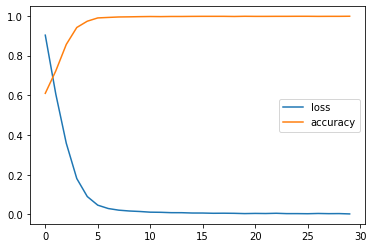

In [ ]:
model_loss_lstm_2 = pd.DataFrame(model_lstm_2.history.history)
model_loss_lstm_2.plot()

In [ ]:
pred_test_lstm_2=model_lstm_2.predict(X_test_lstm)

In [ ]:
pred_test_lstm_2=np.reshape(pred_test_lstm_2, (pred_test_lstm_2.shape[0], pred_test_lstm_2.shape[2]))

In [ ]:
final_predict_lstm_2=np.rint(pred_test_lstm_2)

In [ ]:
accuracy = accuracy_score(validation_y,final_predict_lstm_2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 73.40%


GRU